In [76]:
from shogun import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from time import time
from sklearn import svm
from shogun import *


In [77]:
dataframe = pd.read_csv('../data/vid-game.csv')
df = dataframe.dropna()

# df.shape

In [78]:
# training set
col_x = [col for col in df.columns
      if col != 'Genre']
X_train = df[col_x]

# X_train.head()

In [79]:
# target variable
target = ['Genre']
y_train = df[target]

In [80]:
X_train = X_train.drop(columns=['Name'],axis=0) #Name variable doesn't hold much info
# X_train.columns


In [81]:
#Now we have only the categorical variable
encoder = LabelEncoder()
s = (X_train.dtypes == 'object')
cat_vars= list(s[s].index)

# X_train[cat_vars].notna()

In [82]:
#  Labeling properly the columns with object data type
le = LabelEncoder()

label_X = X_train.copy()
for col in cat_vars:
    label_X[col] = le.fit_transform(label_X[col])
y_train = le.fit_transform(y_train)  #Convert to float    

#Convert features and labels suitable for shogun
label_X= label_X.to_numpy().astype(float)
y_train = y_train.astype(float)
y_train = y_train.reshape(y_train.shape[0],) #reshape to (num_samples,)


In [83]:
time_skl = []
time_sgn = []
time_diff = []
size = [1000,2000,3000,4000,5000,6000,7000,8000,9000]

In [84]:
for m in size:
    print(m)


#SKLEARN
    label_X_temp = label_X[:m]
    y_train_temp = y_train[:m]
    t0 = time()
    skr = svm.SVC()
    skr.fit(label_X, y_train)
    tsk1 = time() - t0
    


#SHOGUN
    train_features = RealFeatures(label_X_temp.T)
    labels_train = MulticlassLabels(y_train_temp)

    t0 = time()
    C = 1.0
    epsilon = 0.001
    gauss_kernel = GaussianKernel(train_features, train_features, 15)

    sg_svm = MulticlassLibSVM(C, gauss_kernel, labels_train)
    sg_svm.set_epsilon(epsilon)

    sg_svm.train()
    tsg1= time() - t0

    print("Sklearn: " + str(tsk1))
    print("Shogun: " + str(tsg1))
    
    time_skl.append(tsk1)
    time_sgn.append(tsg1)
    time_diff.append(tsk1-tsg1)


1000
Sklearn: 3.8494482040405273
Shogun: 0.22597336769104004
2000
Sklearn: 3.6658647060394287
Shogun: 0.8419961929321289
3000
Sklearn: 3.656831741333008
Shogun: 2.098799228668213
4000
Sklearn: 3.6035759449005127
Shogun: 3.0426242351531982
5000
Sklearn: 3.539837598800659
Shogun: 5.6834776401519775
6000
Sklearn: 3.7167184352874756
Shogun: 14.333515882492065
7000
Sklearn: 3.6013081073760986
Shogun: 18.136785745620728
8000
Sklearn: 3.5977728366851807
Shogun: 18.82978868484497
9000
Sklearn: 3.755361318588257
Shogun: 21.71042776107788


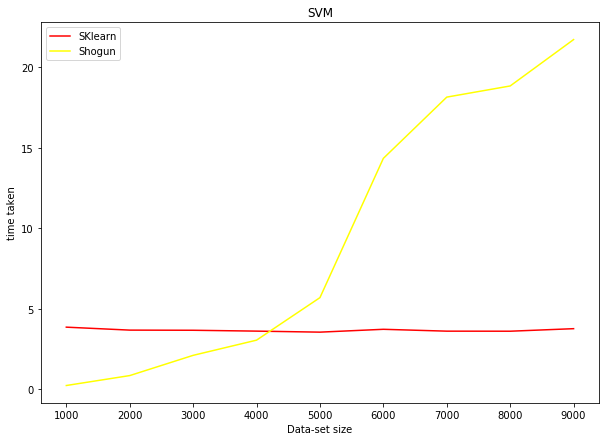

In [85]:
# PLOTTING
plt.figure(figsize=(10,7))
plt.title('SVM')
plt.plot(size,time_skl,color='red',label='SKlearn')
plt.plot(size,time_sgn,color='yellow',label='Shogun')
plt.xlabel('Data-set size')
plt.ylabel('time taken')
plt.legend()